# 逻辑回归

## 考试通过预测

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week3/examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


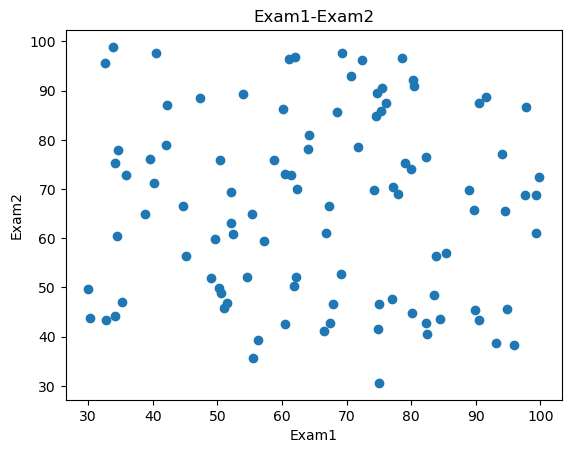

In [7]:
fig1 = plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [17]:
mask = data.loc[:,'Pass']==1
print(type(mask))
print(mask)

<class 'pandas.core.series.Series'>
False


In [12]:
exam1 = data.loc[:,'Exam1']
print(type(exam1))
exam1

<class 'pandas.core.series.Series'>


0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

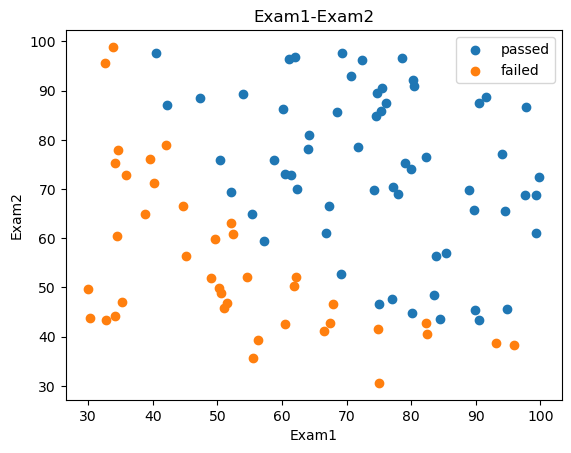

In [19]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [20]:
X = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']
X1.head()

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
Name: Exam1, dtype: float64

In [21]:
from sklearn.linear_model import  LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [22]:
y_predict = LR.predict(X)
y_predict

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy

0.89

In [26]:
y_test = LR.predict([[70,65]])
print('passed' if y_test==1 else 'failed')

passed


C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
LR.coef_

array([[0.20535491, 0.2005838 ]])

In [28]:
LR.intercept_

array([-25.05219314])

In [29]:
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0],LR.coef_[0][1]
print(theta0,theta1,theta2)

[-25.05219314] 0.20535491217790375 0.2005838039546904


In [30]:
X2_new = -(theta0+theta1*X1)/theta2
print(X2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


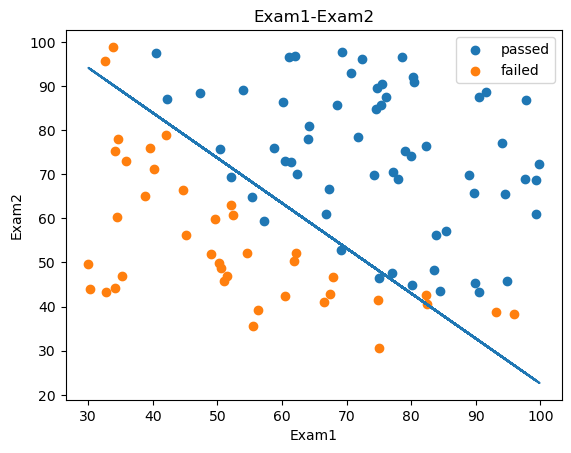

In [32]:
fig3 = plt.figure()
plt.plot(X1,X2_new)
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [34]:
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1 * X2

In [35]:
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
X_new

,X1,X2,X1_2,X2_2,X1_X2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216
...,...,...,...,...,...
95,83.489163,48.380286,6970.440295,2340.652054,4039.229555
96,42.261701,87.103851,1786.051355,7587.080849,3681.156888
97,99.315009,68.775409,9863.470975,4730.056948,6830.430397
98,55.340018,64.931938,3062.517544,4216.156574,3593.334590


In [36]:
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [38]:
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y,y2_predict)
accuracy2

1.0

In [39]:
# 排序，避免画图时产生的是线段
X1_new = X1.sort_values()
X1,X1_new

(0     34.623660
 1     30.286711
 2     35.847409
 3     60.182599
 4     79.032736
         ...    
 95    83.489163
 96    42.261701
 97    99.315009
 98    55.340018
 99    74.775893
 Name: Exam1, Length: 100, dtype: float64,
 63    30.058822
 1     30.286711
 57    32.577200
 70    32.722833
 36    33.915500
         ...    
 56    97.645634
 47    97.771599
 51    99.272527
 97    99.315009
 75    99.827858
 Name: Exam1, Length: 100, dtype: float64)

In [40]:
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

print(X2_new_boundary)

63    132.124249
1     130.914667
57    119.415258
70    118.725082
36    113.258684
         ...    
56     39.275712
47     39.251001
51     38.963585
97     38.955634
75     38.860426
Name: Exam1, Length: 100, dtype: float64


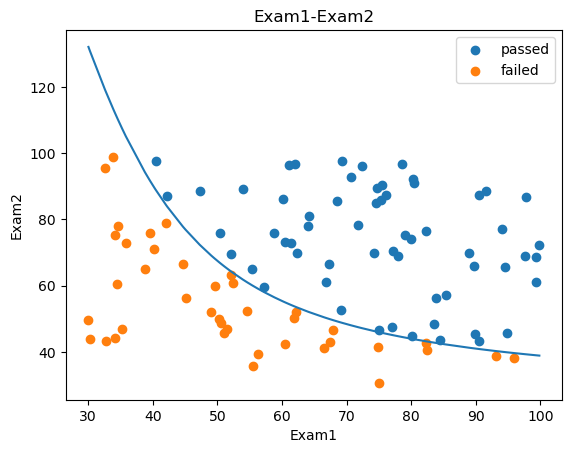

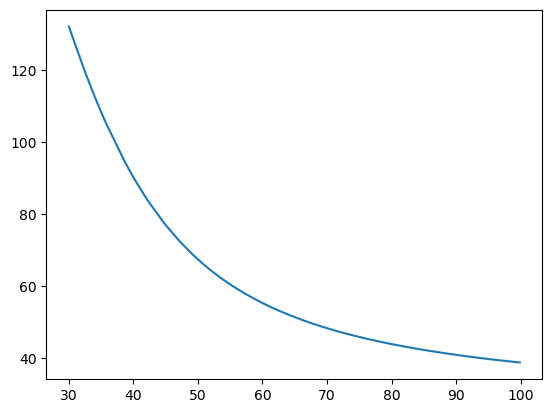

In [41]:
fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

plt.plot(X1_new,X2_new_boundary)
plt.show()

## 芯片质量检测

In [43]:
data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week3/chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [44]:
mask = data.loc[:,'pass']==1

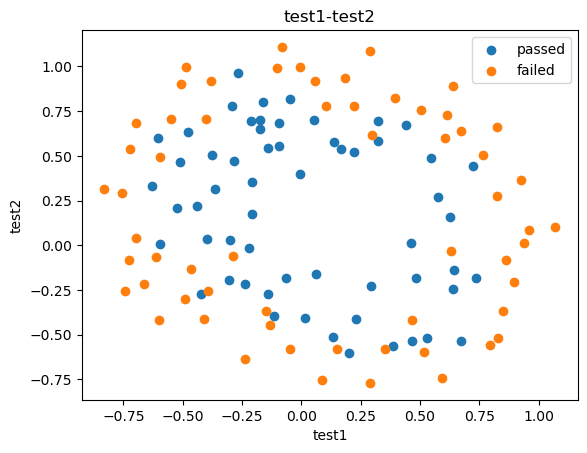

In [45]:
fig1 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [69]:
#define X,y
X = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']
X1.head()
#create new data
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [70]:
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [71]:
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

0.8135593220338984


C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


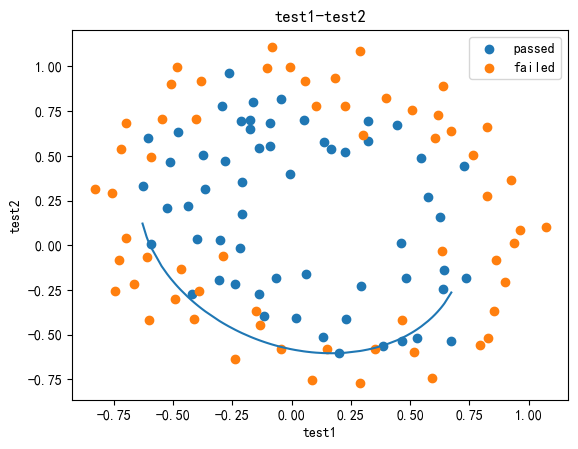

In [72]:
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [73]:
d = np.array(b*b-4*a*c)
#d = (-b+np.sqrt(b*b-4*a*c))/(2*a)
X1_new
#print(np.array(d))

112   -0.83007
86    -0.75518
84    -0.74366
111   -0.72638
113   -0.72062
        ...   
70     0.89804
65     0.92684
68     0.93836
67     0.96141
101    1.07090
Name: test1, Length: 118, dtype: float64

In [74]:
#define f(x)
def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1,X2_new_boundary2

In [75]:
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])
print(X2_new_boundary1,X2_new_boundary2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.1212617]), array([0.04679448]), array([0.02697935]), array([0.00872189]), array([-0.00830576]), array([-0.00830576]), array([-0.11718731]), array([-0.16040224]), array([-0.18016521]), array([-0.18965258]), array([-0.21671004]), array([-0.22530078]), array([-0.23369452]), array([-0.2499261]), array([-0.28761583]), array([-0.30846849]), array([-0.32171919]), array([-0.32816104]), array([-0.33448523]), array([-0.34069505]), array([-0.35278365]), array([-0.35866807]), array([-0.37013014]), array([-0.42186137]), array([-0.42656594]), array([-0.43119936]), array([-0.43574686]), array([-0.44021779]), array([-0.45318277]), array([-0.47336128]), array([-0.47336128]), array([-0.48465118]), array([-0.48828317]), array([-0.49185073]), array([-0.49185073]), array([-0.51193977]), array([-0.51193977]), array([-0.5181489]), array([-0.52412149]), array([-0.52986615]), array([-0.5298

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


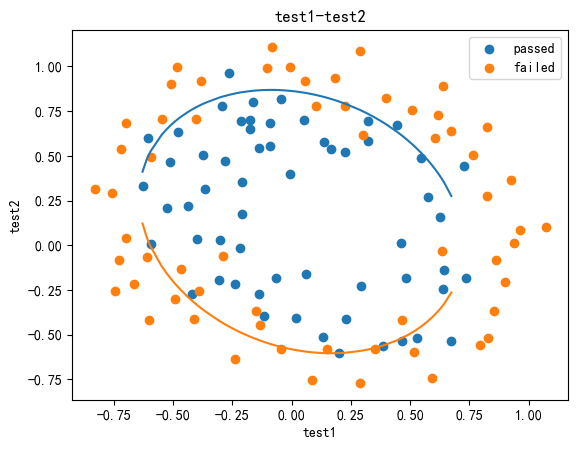

In [77]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary2)
plt.plot(X1_new,X2_new_boundary1)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [54]:
X1_range = [-0.9 + x/10000 for x in range(0,19000)]
X1_range = np.array(X1_range)
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


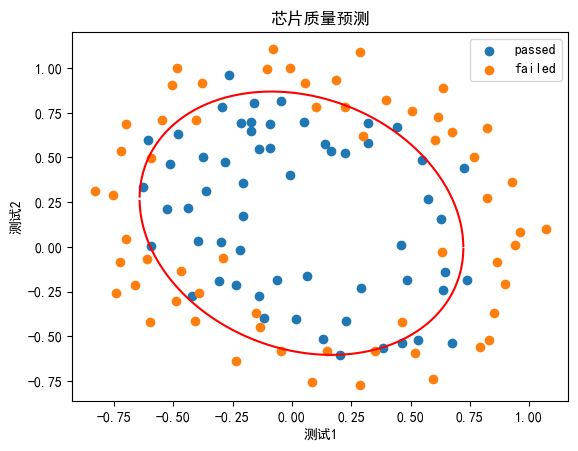

In [55]:
# coding:utf-8
import matplotlib as mlp
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
fig4 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_range,X2_new_boundary1,'r')
plt.plot(X1_range,X2_new_boundary2,'r')
plt.title('test1-test2')
plt.xlabel('测试1')
plt.ylabel('测试2')
plt.title('芯片质量预测')
plt.legend((passed,failed),('passed','failed'))
plt.show()